In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank_altered.csv", usecols=np.arange(1,17))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,0
4,35,management,married,tertiary,0,231,1,0,unknown,5,5,139,1,-1,0,0


Before I dig into statistics let me outline an agenda for the questions I would like answered.

1. Perform the appropriate significance tests on each of the attributes as they pertain to the target, y.  For example, the age attribute can be binned into different age categories.  The age categories can then be compared pairwise by means of two-sample hypothesis testing techniques by means of the chi-squared test.  Likewise, significance tests can be performed on the other categorical variables.  Attributes that show no significant dependence with the target variable, y, may be discarded.
2. Determine if strong correlations exist between attributes in order to detect surrogacy between variables and potentially eliminate variables that may not offer additional predictive power.  I will use chi-squared tests to investigate dependence between categorical variables, the F-test to invenstigate dependence between categorical and numerical variables, and the Pearson correlation coefficient to investigate dependence between numerical variables.

First lets examine the relationship between marital status and term deposit subscription status.  I will use the chi-squared test to determine whether or not these variables are dependent.

In [3]:
df_y_marital = df[['marital', 'y']]
df_y_marital.head()

,marital,y
0,married,0
1,single,0
2,married,0
3,married,0
4,married,0


In [4]:
tbl_y_marital = pd.crosstab(df_y_marital.y, df_y_marital.marital)
tbl_y_marital

marital,divorced,married,single
y,,,
0,4569,24274,10822
1,621,2734,1900


In [5]:
_, p_val, _, _ = stats.chi2_contingency(tbl_y_marital)
print("The p-value is {}.".format(p_val))

The p-value is 6.604211765227822e-43.


Thus we must reject the null hypothesis, $H_0$, that marital status and term deposit subscription status are independent and accept the alternative hypothesis, $H_a$, that the two are correlated.

Now lets examine the relationship between education and term deposit subscription status, again by means of the chi-squared test.

In [6]:
df_y_education = df[['y','education']]

In [7]:
tbl_y_education = pd.crosstab(df_y_education.y, df_y_education.education)

In [8]:
_, p_val, _, _ = stats.chi2_contingency(tbl_y_education)
print("The p-value is {}.".format(p_val))

The p-value is 2.8026078374488455e-51.


Again, this p-value suggests that, if it were true that education and term deposit subscription status are independent, it would be nearly impossible to obtain the $\chi^2$ statistic that was obtained.  Thus it is sensible to conclude that education and term deposit status are correlated.

Now lets examine the relationship between the variables balance and y.  We will divide the balance variable into two groups: those who purchased a term deposit and those who did not.  Then we will compare the population means for statistical significance.

In [9]:
df_balance_0 = df.loc[df.y == 0, 'balance']
df_balance_1 = df.loc[df.y == 1, 'balance']

In [10]:
df_balance_0.mean()

1301.0548342367326

In [11]:
df_balance_1.mean()

1801.4947668886775

In [12]:
diff_mean = df_balance_1.mean() - df_balance_0.mean()

In [13]:
df_balance_0.var()

8853322.17783722

In [14]:
df_balance_1.var()

12219791.86136393

Since the sample sizes are rather large we can approximate using the standard normal distribution, but, since the variances differ significantly we will need to estimate the population standard deviation with the non-pooled test statistic $T_d = \frac{\bar{X}_n - \bar{Y}_m}{S_d}$.  According to the CLT, this statistic approaches the standard normal distribution as n,m $\rightarrow$ $\infty$.

In [15]:
S_d = np.sqrt(df_balance_0.var()/df_balance_0.count() + df_balance_1.var()/df_balance_1.count())

In [16]:
p_val = 2*(1 - stats.norm(0,1).cdf(diff_mean/S_d))
print("The p-value is {}.".format(p_val))

The p-value is 0.0.


We can see from the result above that, assuming there is no difference between the those who purchased a term deposit and those who didn't in terms of average annual balance, the chances of the observed difference in sample means would be nearly impossible.  Thus we must conclude that there is statistically significant difference between the two populations in terms of average annual balance.

Now lets take a look at the variables housing and y.

In [18]:
df_y_housing = df[['y','housing']]
df_y_housing.head()

,y,housing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
tbl_y_housing = pd.crosstab(df_y_housing.y, df_y_housing.housing)
tbl_y_housing

housing,0,1
y,,
0,16496,23169
1,3322,1933


In [21]:
_, p_val, _, _ = stats.chi2_contingency(tbl_y_housing)
print("The p-value is {}.".format(p_val))

The p-value is 2.7988805916346014e-193.


Based on the p-value above, we should accept $H_a$, that the presence of a housing lone and term deposit subscribership are correlated.

I suspect we may obtain similar results examining the relationship between the variables loan and y below.

In [22]:
df_y_loan = df[["y", "loan"]]
df_y_loan.head()

,y,loan
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [23]:
tbl_y_loan = pd.crosstab(df_y_loan.y, df_y_loan.loan)
tbl_y_loan

loan,0,1
y,,
0,32908,6757
1,4773,482


In [24]:
_, p_val, _, _ = stats.chi2_contingency(tbl_y_loan)
print("The p-value is {}".format(p_val))

The p-value is 6.024553553316813e-48


As expected, the variables loan and y are dependent.

Now lets examine the variables contact and y.  This will be a bit intriguing to me because I had struggled to decide whether or not to eliminate this variable due to the large number of "unknown" or simply remove observations corresponding to an "unknown" contact value, deciding finally to postpone that decision until I was able to determine if the variable had any value in predicting the target.  I will filter out the "unknown" values and conduct a chi-squared test on the remaining two categories.

In [25]:
df_y_contact = df.loc[df.contact != "unknown", ['y', 'contact']]
df_y_contact.head()

,y,contact
12550,0,cellular
12551,0,cellular
12552,0,cellular
12553,0,telephone
12554,0,cellular


In [26]:
tbl_y_contact = pd.crosstab(df_y_contact.y, df_y_contact.contact)
tbl_y_contact

contact,cellular,telephone
y,,
0,24810,2475
1,4342,385


In [27]:
_, p_val, _, _ = stats.chi2_contingency(tbl_y_contact)
print("The p-value is {}.".format(p_val))

The p-value is 0.04199991704317764.


This p-value is not nearly as small as the p-values obtained earlier, leading me to suspect that the correlation between the variables contact and y is not as strong as it is between y and the other tested variables.  I may decided to remove this variable.

Now lets take a look at the relationship between the variable pairs day and y and month and y.

In [29]:
df_y_day = df[['y', 'day']]
df_y_month = df[['y', 'month']]

In [30]:
tbl_y_day = pd.crosstab(df_y_day.y, df_y_day.day)
tbl_y_month = pd.crosstab(df_y_month.y, df_y_month.month)

In [31]:
tbl_y_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
y,,,,,,,,,,,,,,,,,,,,,
0,230,1106,895,1200,1678,1728,1645,1635,1375,401,...,747,813,385,701,910,966,1677,1605,1289,595
1,90,180,177,229,213,180,154,200,178,121,...,152,125,62,133,114,147,141,129,270,46


In [32]:
tbl_y_month

month,1,2,3,4,5,6,7,8,9,10,11,12
y,,,,,,,,,,,,
0,1249,2199,227,2354,12811,4706,6238,5500,304,409,3555,113
1,139,437,247,571,922,545,626,683,266,318,401,100


In [35]:
_, p_val, _, expected_day = stats.chi2_contingency(tbl_y_day)
print("The p-value from the test between day and y is {}".format(p_val))

The p-value from the test between day and y is 2.9461312597786065e-101


In [36]:
_, p_val, _, expected_month = stats.chi2_contingency(tbl_y_month)
print("The p-value from the test between month and y is {}".format(p_val))

The p-value from the test between month and y is 0.0


In [37]:
expected_day

array([[ 282.56455922, 1135.55632235,  946.59127337, 1261.82735975,
        1669.77994212, 1684.79118433, 1588.54263134, 1620.33114426,
        1371.32112645,  460.93343722, 1288.31778718, 1406.64169635,
        1396.04552538, 1627.39525824, 1501.12422084, 1245.05008905,
        1705.98352627, 2027.40071238, 1534.67876224, 2410.62889581,
        1780.15672306,  793.82980855,  828.2673642 ,  394.70736866,
         736.43388246,  904.20658949,  982.79485752, 1605.31990205,
        1531.14670525, 1376.61921193,  566.01213268],
       [  37.43544078,  150.44367765,  125.40872663,  167.17264025,
         221.22005788,  223.20881567,  210.45736866,  214.66885574,
         181.67887355,   61.06656278,  170.68221282,  186.35830365,
         184.95447462,  215.60474176,  198.87577916,  164.94991095,
         226.01647373,  268.59928762,  203.32123776,  319.37110419,
         235.84327694,  105.17019145,  109.7326358 ,   52.29263134,
          97.56611754,  119.79341051,  130.20514248,  212.6800

In [38]:
expected_month

array([[ 1225.6237756 ,  2327.62555654,   418.54875334,  2582.81667409,
        12126.43466162,  4636.70781389,  6061.00979519,  5459.67709261,
          503.3181211 ,   641.95135797,  3493.20436331,   188.08203473],
       [  162.3762244 ,   308.37444346,    55.45124666,   342.18332591,
         1606.56533838,   614.29218611,   802.99020481,   723.32290739,
           66.6818789 ,    85.04864203,   462.79563669,    24.91796527]])

I can't eliminate the day or month variables on the basis of the results above, but I suspect these two variables will provide little predictive power.  I may have to wait and see how these variables perform when fitted to a predictive model.

Now lets take a look at the call duration as it pertains to the target variable, y.

In [41]:
df_duration_0 = df.loc[df.y == 0, 'duration']
df_duration_1 = df.loc[df.y == 1, 'duration']

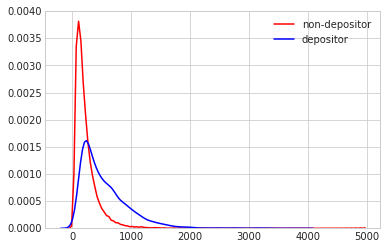

In [45]:
sns.set_style('whitegrid')
sns.kdeplot(df_duration_0, color='red')
sns.kdeplot(df_duration_1, color='blue')
plt.legend(['non-depositor', 'depositor'])
plt.show()

Since neither of these groups is normally distributed the one-way f-test would not be appropriate to use.  I will resort to the standard two-sample significance test, relying on the large sample size and the CLT to compare the population means.

In [47]:
diff_mean = df_duration_1.mean() - df_duration_0.mean()
diff_mean

316.390966326812

In [49]:
S_d = np.sqrt(df_duration_1.var()/df_duration_1.count() + df_duration_0.var()/df_duration_0.count())

In [52]:
p_val = 2*(1 - stats.norm(0,1).cdf(diff_mean/S_d))
print("The p-value is {}.".format(p_val))

The p-value is 0.0.


Based on the results above the observed differences in call duration between depositors and non-depositors is not due to chance.  Furthermore, we can see from the KDE plots above that being a depositor is associated with longer call durations.

Now lets take a look at the relationship between the variables campaign and y.

In [54]:
df_campaign_0 = df.loc[df.y == 0, 'campaign']
df_campaign_1 = df.loc[df.y == 1, 'campaign']

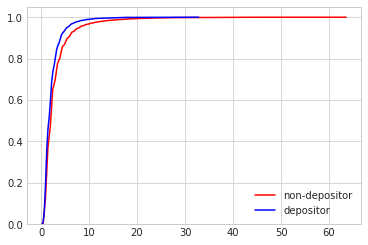

In [57]:
sns.kdeplot(df_campaign_0, cumulative=True, color='red')
sns.kdeplot(df_campaign_1, cumulative=True, color='blue')
plt.legend(['non-depositor', 'depositor'])
plt.show()

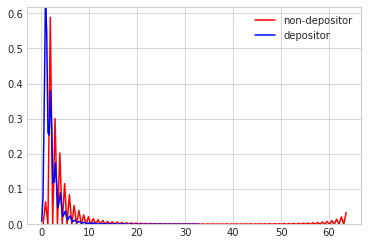

In [58]:
sns.kdeplot(df_campaign_0, color='red')
sns.kdeplot(df_campaign_1, color='blue')
plt.legend(['non-depositor', 'depositor'])
plt.show()

From the KDE estimates for the PDFs and CDFs above we can see that this data is not normally distributed.  Thus it would be inappropriate to use a one-way f-test.  I will resort to the standard two-sample significance test comparing population means and relying on the large sample size and the CLT to guarantee that my test statistic is approximately normally distributed.

In [61]:
diff_mean = df_campaign_0.mean() - df_campaign_1.mean()

In [62]:
S_d = np.sqrt(df_campaign_0.var()/df_campaign_0.count() + df_campaign_1.var()/df_campaign_1.count())
S_d

0.03102356230204338

In [63]:
p_val = 2*(1 - stats.norm(0,1).cdf(diff_mean/S_d))
print("The p-value is {}.".format(p_val))

The p-value is 0.0.


Based on the result above we ought to favor $H_a$, that the population means for depositors and non-depositors are in fact different.  It would appear that greater number of contacts may be more strongly associated with non-depositors than depositors.